# Uvod u veštačku inteligenciju

1. Crtanje grafika funkcija
2. Pronalaženje minimuma i maksimuma funkcije
3. Pronalaženje nula funkcije

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Zadatak 1

Definisati funkciju cubic koja prima četiri parametra koji predstavljaju koeficijente polinoma trećeg stepena.

Rezultat ove funkcije je funkcija koja koja računa vrednost polinoma za zadato x.

Pozvati funkciju cubic sa parametrima -0.4, -0.9, 2.5, 3.2. Iscrtati dobijenu funkciju na itervalu od -5 do 3.

In [2]:
def cubic(a, b, c, d):
    def cubic_eval(x):
        return a*x**3 + b*x**2 + c*x + d
    return cubic_eval

In [3]:
p1 = cubic(-0.4, -0.9, 2.5, 3.2)

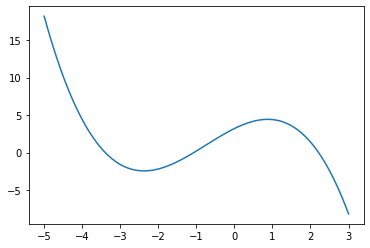

In [4]:
x = np.linspace(-5, 3, 100)
y = p1(x)
plt.plot(x, y)

## Zadatak 2

Za dobijenu funkciju na itervalu od -4 do 2 izračunati minimum i maksimum.

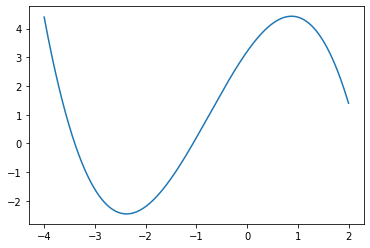

In [5]:
x = np.linspace(-4, 2, 1000)
y = p1(x)
plt.plot(x, y)

In [6]:
minimum = y[0]
maksimum = y[0]
for yy in y:
    if(minimum > yy):
        minimum = yy
    if(maksimum < yy):
        maksimum = yy
print(minimum, maksimum)

-2.4554675932323855 4.4304736086355545


In [7]:
print(np.min(y), np.max(y))

-2.4554675932323855 4.4304736086355545


## Zadatak 3

Za dobijenu funkciju na itervalu od -4 do 2 izračunati vrednosti argumenta x za koje funkcija ima najmanju, odnosno najveću vrednost.

In [19]:
minimum_u = 0
maksimum_u = 0
minimum = p1(0)
maksimum = p1(0)
for xx in x:
    if(minimum > p1(xx)):
        minimum = p1(xx)
        minimum_u = xx
    if(maksimum < p1(xx)):
        maksimum = p1(xx)
        maksimum_u = xx

print("{:<22}{:<22}".format("Minimum u", "Vrednost"))
print("{:<22}{:<22}".format(minimum_u, minimum))
print("{:<22}{:<22}".format("Maksimum u", "Vrednost"))
print("{:<22}{:<22}".format(maksimum_u, maksimum))

Minimum u             Vrednost              
2.5                   -2.425                
Maksimum u            Vrednost              
0.8761261261261262    4.430473314804944     


In [20]:
minimum_indeks = np.argmin(y)
maksimum_indeks = np.argmax(y)
print("{:<22}{:<22}".format("Minimum u [Numpy]", "Vrednost [Numpy]"))
print("{:<22}{:<22}".format(x[minimum_indeks], y[minimum_indeks]))
print("{:<22}{:<22}".format("Maksimum u [Numpy]", "Vrednost [Numpy]"))
print("{:<22}{:<22}".format(x[maksimum_indeks], y[maksimum_indeks]))

Minimum u [Numpy]     Vrednost [Numpy]      
0.4774774774774775    -0.46334420614917327  
Maksimum u [Numpy]    Vrednost [Numpy]      
2.0945945945945947    1.014363660592661     


## Zadatak 4

Prikazati pronađeni minimum i maksimum na grafiku.

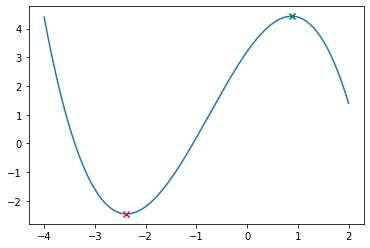

In [10]:
plt.plot(x, y)
plt.scatter([x[minimum_indeks]], [y[minimum_indeks]], c="r", marker="x")
plt.scatter([x[maksimum_indeks]], [y[maksimum_indeks]], c="g", marker="x")

## Zadatak 5

Na intervalu od -5 do 3 pronaći sve nule prethodno zadate funkcije.

Iscrtati rezultate kao vertikalne linije koje prolaze kroz nule.

In [11]:
x = np.linspace(-5, 3, 100000)
y = p1(x)
tol = 0.001

[-3.3967839678396787, -1.065240652406524, 2.2115121151211508]


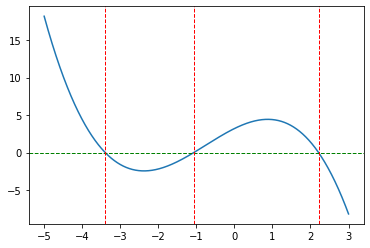

In [12]:
nule = []
for xx in x:
    if(abs(p1(xx)) < tol):
        if len(nule) > 0 and abs(nule[-1]-xx) < 0.01:
            continue
        nule.append(xx)

print(nule)
plt.plot(x, y)
plt.axhline(0, linewidth=1, c="g", linestyle="--")
for n in nule:
    plt.axvline(n, linewidth=1, c="r", linestyle="--")

[-3.3967839678396787, -1.065240652406524, 2.2115121151211508]


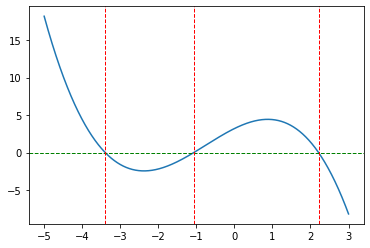

In [13]:
nule_sve = x[np.abs(y) < tol]
nule = [nule_sve[0]]
for i in range(1, len(nule_sve)):
    diff = np.abs(nule_sve[i] - nule[-1])
    if diff > tol:
        nule.append(nule_sve[i])

print(nule)
plt.plot(x, y)
plt.axhline(0, linewidth=1, c="g", linestyle="--")
for n in nule:
    plt.axvline(n, linewidth=1, c="r", linestyle="--")

[-3.39678397 -1.06524065  2.21151212]


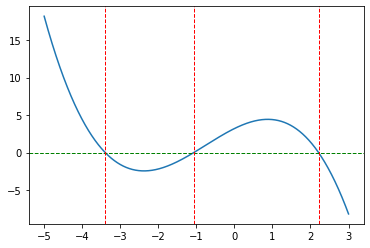

In [14]:
nule_sve = x[np.abs(y) < tol]
nule = nule_sve[np.abs(np.diff(nule_sve, prepend=0))>tol]

print(nule)
plt.plot(x, y)
plt.axhline(0, linewidth=1, c="g", linestyle="--")
for n in nule:
    plt.axvline(n, linewidth=1, c="r", linestyle="--")

## Zadatak 6

Definisati polinom sa koeficijentima -0.7, 2.7, -2.1 i 0. Uz pretpostavku da ovaj polinom na intervalu 0.25 do 2.5 ima samo jednu nulu pronaći tu nulu metodom polovljenja.

In [15]:
p2 = cubic(-0.7, 2.7, -2.1, 0)

In [16]:
def metoda_polovljenja(a, b, f, tol = 0.0001):
    c = (a+b)/2
    while np.abs(f(c)) > tol:
        if np.sign(f(c)) != np.sign(f(a)):
            b = c
        else:
            a = c
        c = (a+b)/2
    return c

1.0804290771484375
3.1996666512768e-05


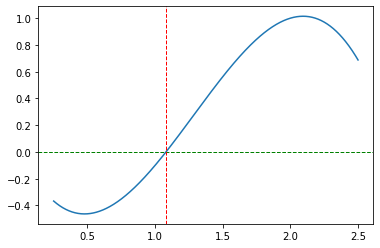

In [17]:
nula_u = metoda_polovljenja(0.25, 2.5, p2)

print(nula_u)
print(p2(nula_u))
x = np.linspace(0.25, 2.5, 1000)
y = p2(x)

plt.plot(x, y)
plt.axhline(0, linewidth=1, c="g", linestyle="--")
plt.axvline(nula_u, linewidth=1, c="r", linestyle="--")

## Zadatak 7

Za prethodno navedeni polinom na intervalu 0.25 do 2.5 naći x za koje je vrednost polinoma jednaka -0.2.

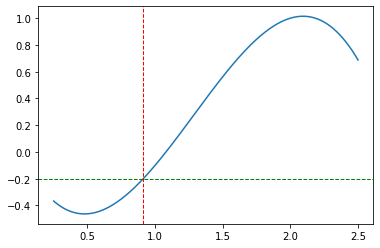

In [18]:
x = np.linspace(0.25, 2.5, 1000)
y = p2(x)

nula = metoda_polovljenja(0.25, 2.5, lambda x: p2(x)+0.2)
plt.plot(x, y)
plt.axhline(-0.2, linewidth=1, c="g", linestyle="--")
plt.axvline(nula, linewidth=1, c="r", linestyle="--")